https://www.kaggle.com/grassknoted/asl-alphabet

Data was downloaded from above link. Consists of pictures of the ASL alphabet.

In [1]:
#import TensorFlow and Keras API
import tensorflow as tf
from tensorflow import keras

#other imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

In [2]:
#Define functions used in Cats vs Dogs dataset

def ReturnCatagories(main_path):
    main_path = main_path
    Catagories = os.listdir(main_path)
    if Catagories[0].lower() == 'test':
        Catagories = os.listdir(main_path + '/Test')
    return(Catagories)

def FormatImgData(main_path, Catagories, IMG_Height, IMG_Width, max_samples):
    main_path, Catagories, IMG_Height, IMG_Width, max_samples = main_path, Catagories, IMG_Height, IMG_Width, max_samples
    #needed imports
    import os    
    #Stop if folder does not contain all catagories
    #Warn if folder contains more than catagories
    for i in Catagories:
        if i not in os.listdir(main_path):
            print('Point main_path to a folder containing all specified catagories')
            return
    if len(Catagories) < len(os.listdir(main_path)):
        print('StoreImageArray - WARNING: More folders found than catagories specified')
    
    import cv2
    #iterate over catagories to create arrays and store in "data"
    data = []
    for catagory in Catagories:
        class_num = Catagories.index(catagory) #store catagory as int
        cat_path = os.path.join(main_path,catagory)
        images = os.listdir(cat_path)
        np.random.shuffle(images)
        count = 0
        for img in images:
            if count > max_samples:
                break
            img_path = os.path.join(cat_path,img) #get image path
            try:
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #read and change to grayscale/color
                norm_array = cv2.resize(img_array, (IMG_Height,IMG_Width)) #resize images
                norm_array = norm_array / 255 #convert to normalized binary image data
                data.append([norm_array, class_num])
                count = count+1
            except Exception as e: #disregard unreadable files
                pass
    #Shuffle data
    np.random.shuffle(data)
    
    return(data)

def PlotSomeData(data,Catagories,num):
    data, Catagories, num = data, Catagories, num
    
    sqr = np.ceil(num**.5)
    
    plt.figure(figsize=(10,10))
    for i in range(num):
        plt.subplot(sqr,sqr,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[i][0], cmap='binary')
        plt.xlabel(Catagories[data[i][1]])
    plt.show()
    
def CreateXY(data):
    data = data
    X = []
    Y = []
    for img,category in data:
        X.append(img)
        Y.append(category)
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape(-1, IMG_Height, IMG_Width, 1)
    return(X,Y)

Data length: 29029


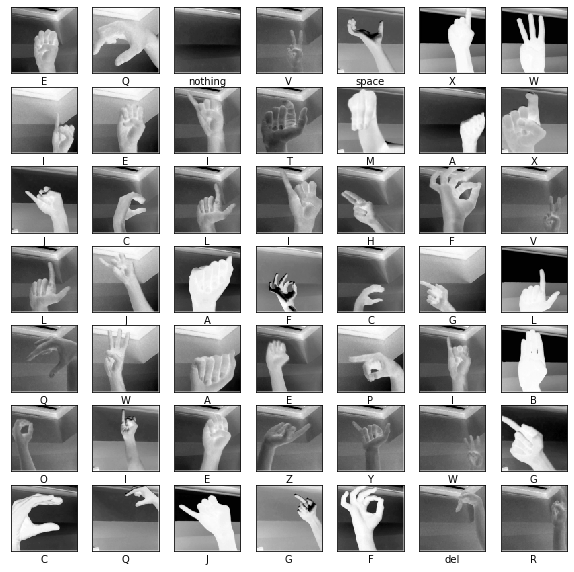

In [3]:
#Set path to folder location
main_path = 'C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 3 Neural Networks/asl_alphabet_train/asl_alphabet_train'

#Store catagories as list
Catagories = ReturnCatagories(main_path=main_path)

#Store data as formatted grayscale array, catagory number pairs
IMG_Height = 100
IMG_Width = 100
data = FormatImgData(main_path=main_path, Catagories=Catagories,
                    IMG_Height=IMG_Height, IMG_Width=IMG_Width,
                    max_samples=1000)

#print length of data
print('Data length: {}'.format(len(data)))

#plot some data to make sure it looks right
PlotSomeData(data=data,Catagories=Catagories,num=49)

In [4]:
#Putting Data into X,Y format
X, Y = CreateXY(data)

In [5]:
#Setting up the layers in the model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#initiate model
model = keras.Sequential()

#First layer
model.add(Conv2D(128, (3,3), input_shape=(IMG_Height,IMG_Width,1))) #in shape, last digit is 3 if color, 1 if grayscale
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second layer
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third layer
model.add(Flatten())

#Fourth layer
model.add(Dense(128))
model.add(Activation('relu'))

#Fifth layer
model.add(Dense(len(Catagories)))
model.add(Activation('relu'))

In [6]:
#Create early stop callback
from tensorflow.keras.callbacks import EarlyStopping

stop_on_val_loss = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, patience=2)

In [7]:
#Callback to store epoch data for graphing
from tensorflow.keras.callbacks import CSVLogger
file_name = 'ASL_logs.csv'
csv_logger = CSVLogger(filename=file_name, separator=',', append=False)

In [8]:
#Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
#compile model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
#Train the model
model.fit(X,Y, batch_size=256, epochs = 25,
         validation_split=0.15, callbacks=[stop_on_val_loss, csv_logger])

Train on 24674 samples, validate on 4355 samples
Epoch 1/15
24674/24674 [==============================] - 692s 28ms/sample - loss: 3.1570 - accuracy: 0.1289 - val_loss: 2.7271 - val_accuracy: 0.2726
Epoch 2/15
24674/24674 [==============================] - 647s 26ms/sample - loss: 2.3821 - accuracy: 0.3695 - val_loss: 2.1299 - val_accuracy: 0.4489
Epoch 3/15
24674/24674 [==============================] - 639s 26ms/sample - loss: 1.9095 - accuracy: 0.4939 - val_loss: 1.8138 - val_accuracy: 0.5222
Epoch 4/15
24674/24674 [==============================] - 643s 26ms/sample - loss: 1.6524 - accuracy: 0.5561 - val_loss: 1.6852 - val_accuracy: 0.5522
Epoch 5/15
24674/24674 [==============================] - 660s 27ms/sample - loss: 1.5198 - accuracy: 0.5828 - val_loss: 1.5886 - val_accuracy: 0.5724
Epoch 6/15
24674/24674 [==============================] - 668s 27ms/sample - loss: 1.4353 - accuracy: 0.6005 - val_loss: 1.5107 - val_accuracy: 0.5809
Epoch 7/15
24674/24674 [=====================

In [15]:
#Plot Epoch data
def PlotTrainingData(path, file_name):
    path, file_name = path, file_name
    path = os.path.join(path,file_name)
    epoch_data = pd.read_csv(path)
    epoch_data.drop(columns=['epoch'],inplace=True)
    display(epoch_data)
    plt.figure(figsize=(10,7))
    plt.tight_layout()
    #Plot accuracy and val_accuracy
    plt.subplot(2,2,1)
    acc_data = epoch_data[['accuracy','val_accuracy']]
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Model Accuracy')
    plt.plot(acc_data)
    plt.legend(['train','test'])
    #Plot loss and val_loss
    plt.subplot(2,2,2)
    loss_data = epoch_data[['loss','val_loss']]
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Model Loss')
    plt.plot(loss_data)
    plt.legend(['train','test'])
    


,accuracy,loss,val_accuracy,val_loss
0,0.128881,3.157007,0.272560,2.727129
1,0.369498,2.382115,0.448909,2.129882
2,0.493921,1.909494,0.522158,1.813757
3,0.556132,1.652376,0.552239,1.685223
4,0.582840,1.519757,0.572445,1.588552
5,0.600511,1.435263,0.580941,1.510668
6,0.617249,1.366450,0.606659,1.429344
7,0.632771,1.310410,0.608955,1.425799
8,0.638607,1.270734,0.615385,1.384267
9,0.646024,1.242377,0.620207,1.381523


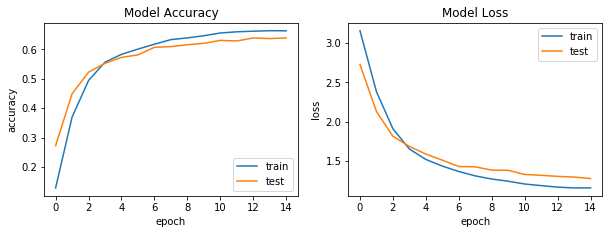

In [16]:
#data_path is folder name, file_name was defined above
data_path = 'C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 3 Neural Networks'
PlotTrainingData(path=data_path, file_name=file_name)